In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
data = pd.read_csv("./desktop/data2.csv", sep=",")

In [154]:
data

,시코드,구코드,행정동코드,분석용상품대분류명,20190201,20190202,20190203,20190204,20190205,20190206,...,20200522,20200523,20200524,20200525,20200526,20200527,20200528,20200529,20200530,20200531
0,서울특별시,중구,소공동,식사,28.8,30.4,27.6,35.6,31.8,33.0,...,26.8,24.3,32.8,30.0,24.8,26.5,25.1,24.0,23.0,32.5
1,서울특별시,중구,소공동,간식,18.6,22.7,22.5,23.8,26.9,20.9,...,19.5,22.9,18.1,17.4,17.7,20.0,19.6,22.5,21.3,19.2
2,서울특별시,중구,소공동,마실거리,38.4,34.5,27.2,30.8,31.9,33.5,...,39.5,40.2,35.4,41.2,37.8,42.9,42.2,43.0,43.0,37.5
3,서울특별시,중구,소공동,홈&리빙,4.2,2.8,1.7,1.5,1.6,3.6,...,3.6,2.7,2.7,3.8,4.6,2.6,4.3,2.7,4.2,2.0
4,서울특별시,중구,소공동,헬스&뷰티,8.1,8.4,18.8,5.7,6.2,6.9,...,8.7,7.7,9.7,6.5,14.0,6.8,7.5,6.2,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,대구광역시,수성구,고산3동,홈&리빙,1.3,0.8,1.2,1.6,1.6,0.5,...,1.7,1.6,1.8,1.6,0.3,0.6,1.2,1.1,1.2,3.5
476,대구광역시,수성구,고산3동,헬스&뷰티,3.0,5.6,7.7,6.6,6.5,6.4,...,5.4,3.7,5.8,3.3,4.0,4.7,4.8,4.2,4.5,5.1
477,대구광역시,수성구,고산3동,취미&여가활동,0.9,1.0,0.0,0.7,1.6,1.0,...,0.0,0.3,0.5,0.5,0.1,1.6,0.5,0.6,0.4,0.6
478,대구광역시,수성구,고산3동,사회활동,0.9,2.0,0.9,1.7,2.0,0.7,...,0.3,1.0,0.9,0.0,0.7,0.3,0.8,0.0,0.2,0.8


In [84]:
data.isnull().sum()

PVN                  0
BOR                  0
ADMD                 0
ANTC_ITEM_LCLS_CD    0
ANTC_ITEM_LCLS_NM    0
                    ..
20200527             6
20200528             4
20200529             5
20200530             3
20200531             8
Length: 246, dtype: int64

In [85]:
data.fillna(0,inplace=True)

In [86]:
del data["ANTC_ITEM_LCLS_CD"]

In [87]:
data.dtypes

PVN                  object
BOR                  object
ADMD                 object
ANTC_ITEM_LCLS_NM    object
20190201             object
                      ...  
20200527             object
20200528             object
20200529             object
20200530             object
20200531             object
Length: 245, dtype: object

In [88]:
data_1 = data.loc[list(range(0,480)),data.columns[:4]]

In [89]:
data_2 = data.loc[list(range(0,480)),data.columns[4:]]

In [90]:
data_1.columns = ["시코드","구코드","행정동코드","분석용상품대분류명"]

In [91]:
data_2 = data_2.apply(lambda x: x.str.replace("%",""), axis = 1)

In [92]:
data_2.fillna(0,inplace=True)

In [93]:
data_2

,20190201,20190202,20190203,20190204,20190205,20190206,20190207,20190208,20190209,20190210,...,20200522,20200523,20200524,20200525,20200526,20200527,20200528,20200529,20200530,20200531
0,28.8,30.4,27.6,35.6,31.8,33.0,27.0,27.0,29.7,33.1,...,26.8,24.3,32.8,30.0,24.8,26.5,25.1,24.0,23.0,32.5
1,18.6,22.7,22.5,23.8,26.9,20.9,19.2,20.3,23.1,22.1,...,19.5,22.9,18.1,17.4,17.7,20.0,19.6,22.5,21.3,19.2
2,38.4,34.5,27.2,30.8,31.9,33.5,36.8,39.6,34.3,33.3,...,39.5,40.2,35.4,41.2,37.8,42.9,42.2,43.0,43.0,37.5
3,4.2,2.8,1.7,1.5,1.6,3.6,4.0,3.1,1.8,2.4,...,3.6,2.7,2.7,3.8,4.6,2.6,4.3,2.7,4.2,2.0
4,8.1,8.4,18.8,5.7,6.2,6.9,10.6,8.4,7.7,6.7,...,8.7,7.7,9.7,6.5,14.0,6.8,7.5,6.2,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,1.3,0.8,1.2,1.6,1.6,0.5,0.6,2.1,2.1,0.9,...,1.7,1.6,1.8,1.6,0.3,0.6,1.2,1.1,1.2,3.5
476,3.0,5.6,7.7,6.6,6.5,6.4,3.2,3.6,4.1,3.2,...,5.4,3.7,5.8,3.3,4.0,4.7,4.8,4.2,4.5,5.1
477,0.9,1.0,0,0.7,1.6,1.0,1.1,0.3,0,0,...,0,0.3,0.5,0.5,0.1,1.6,0.5,0.6,0.4,0.6
478,0.9,2.0,0.9,1.7,2.0,0.7,1.5,1.0,1.0,0.8,...,0.3,1.0,0.9,0.0,0.7,0.3,0.8,0,0.2,0.8


In [94]:
data_2 = data_2.apply(pd.to_numeric)

In [95]:
data_2.dtypes

20190201    float64
20190202    float64
20190203    float64
20190204    float64
20190205    float64
             ...   
20200527    float64
20200528    float64
20200529    float64
20200530    float64
20200531    float64
Length: 241, dtype: object

In [96]:
data = pd.concat([data_1,data_2],axis=1)

In [160]:
data.columns

Index(['시코드', '구코드', '행정동코드', '분석용상품대분류명', '20190201', '20190202', '20190203',
       '20190204', '20190205', '20190206',
       ...
       '20200522', '20200523', '20200524', '20200525', '20200526', '20200527',
       '20200528', '20200529', '20200530', '20200531'],
      dtype='object', length=245)

In [101]:
newdata = data.groupby(["시코드","구코드","분석용상품대분류명"])[x[4:]].mean()

In [102]:
newdataT = newdata.T
newdataT

시코드         대구광역시                                                      \
구코드           수성구                                                       
분석용상품대분류명      간식    마실거리   사회활동      식사  임신/육아 취미&여가활동  헬스&뷰티   홈&리빙   
20190201   19.765  32.295  0.990  36.875  0.460   0.440  5.620  3.555   
20190202   20.970  34.200  1.015  34.210  0.560   0.560  6.280  2.190   
20190203   20.905  32.980  0.790  33.045  0.430   0.575  9.265  2.000   
20190204   22.635  33.665  1.285  31.735  0.595   0.785  7.245  2.065   
20190205   23.665  36.940  1.510  26.865  0.940   0.895  7.325  1.865   
...           ...     ...    ...     ...    ...     ...    ...    ...   
20200527   19.845  40.060  0.650  30.215  0.495   0.425  5.600  2.715   
20200528   19.480  40.520  0.805  29.990  0.535   0.440  5.660  2.565   
20200529   20.810  39.160  1.010  29.175  0.535   0.460  5.730  3.160   
20200530   22.115  40.990  0.715  27.265  0.645   0.415  5.415  2.405   
20200531   22.905  40.470  0.900  26.760  0.670   0.385  5.400  2.500   

시코드                              ...     서울특별시                       \
구코드               중구             ...       노원구                   중구   
분석용상품대분류명         간식       마실거리  ...     헬스&뷰티      홈&리빙         간식   
20190201   16.657143  31.271429  ...  5.422222  3.027778  20.893333   
20190202   18.657143  34.600000  ...  4.416667  2.811111  24.020000   
20190203   18.057143  32.414286  ...  7.950000  2.316667  23.046667   
20190204   19.071429  35.442857  ...  5.405556  2.661111  24.773333   
20190205   19.457143  37.042857  ...  5.927778  2.355556  26.673333   
...              ...        ...  ...       ...       ...        ...   
20200527   16.728571  39.400000  ...  4.655556  2.511111  20.380000   
20200528   17.571429  38.400000  ...  4.983333  3.222222  20.773333   
20200529   19.671429  40.528571  ...  4.583333  2.866667  21.746667   
20200530   19.385714  39.300000  ...  4.927778  2.650000  22.580000   
20200531   19.757143  37.942857  ...  5.333333  2.861111  21.593333   

시코드                                                                       \
구코드                                                                        
분석용상품대분류명       마실거리      사회활동         식사     임신/육아   취미&여가활동      헬스&뷰티   
20190201   33.120000  1.120000  33.046667  0.240000  1.106667   5.960000   
20190202   34.066667  1.320000  30.413333  0.413333  0.646667   5.993333   
20190203   28.706667  1.426667  29.913333  0.306667  0.706667  13.293333   
20190204   31.340000  1.446667  31.306667  0.520000  1.013333   6.553333   
20190205   32.933333  1.326667  28.913333  0.640000  0.820000   6.260000   
...              ...       ...        ...       ...       ...        ...   
20200527   38.440000  0.833333  29.173333  0.513333  0.520000   6.246667   
20200528   38.060000  0.880000  29.033333  0.393333  0.620000   6.200000   
20200529   39.200000  0.726667  27.940000  0.340000  0.940000   5.953333   
20200530   39.860000  0.880000  25.400000  0.480000  0.633333   6.500000   
20200531   37.306667  1.033333  28.406667  0.606667  0.506667   6.906667   

시코드                  
구코드                  
분석용상품대분류명      홈&리빙  
20190201   4.506667  
20190202   3.126667  
20190203   2.640000  
20190204   3.040000  
20190205   2.446667  
...             ...  
20200527   3.913333  
20200528   4.040000  
20200529   3.153333  
20200530   3.673333  
20200531   3.633333  

[241 rows x 32 columns]

In [118]:
newdataT_2019 = newdataT.iloc[:120,:32]
newdataT_2019

시코드         대구광역시                                                      \
구코드           수성구                                                       
분석용상품대분류명      간식    마실거리   사회활동      식사  임신/육아 취미&여가활동  헬스&뷰티   홈&리빙   
20190201   19.765  32.295  0.990  36.875  0.460   0.440  5.620  3.555   
20190202   20.970  34.200  1.015  34.210  0.560   0.560  6.280  2.190   
20190203   20.905  32.980  0.790  33.045  0.430   0.575  9.265  2.000   
20190204   22.635  33.665  1.285  31.735  0.595   0.785  7.245  2.065   
20190205   23.665  36.940  1.510  26.865  0.940   0.895  7.325  1.865   
...           ...     ...    ...     ...    ...     ...    ...    ...   
20190527   19.030  35.300  0.480  36.285  0.485   0.480  5.620  2.340   
20190528   18.320  37.970  0.760  34.545  0.445   0.460  3.790  3.715   
20190529   18.360  40.835  0.725  32.960  0.625   0.465  3.925  2.085   
20190530   19.300  40.860  0.650  32.445  0.470   0.375  3.880  1.990   
20190531   19.375  39.010  0.750  33.025  0.530   0.495  3.935  2.840   

시코드                              ...     서울특별시                       \
구코드               중구             ...       노원구                   중구   
분석용상품대분류명         간식       마실거리  ...     헬스&뷰티      홈&리빙         간식   
20190201   16.657143  31.271429  ...  5.422222  3.027778  20.893333   
20190202   18.657143  34.600000  ...  4.416667  2.811111  24.020000   
20190203   18.057143  32.414286  ...  7.950000  2.316667  23.046667   
20190204   19.071429  35.442857  ...  5.405556  2.661111  24.773333   
20190205   19.457143  37.042857  ...  5.927778  2.355556  26.673333   
...              ...        ...  ...       ...       ...        ...   
20190527   16.428571  35.071429  ...  5.727778  2.627778  19.500000   
20190528   15.357143  38.957143  ...  3.472222  2.716667  20.673333   
20190529   16.657143  41.471429  ...  3.350000  3.911111  21.146667   
20190530   16.028571  40.371429  ...  3.716667  2.577778  20.520000   
20190531   16.257143  40.871429  ...  3.611111  2.094444  20.833333   

시코드                                                                       \
구코드                                                                        
분석용상품대분류명       마실거리      사회활동         식사     임신/육아   취미&여가활동      헬스&뷰티   
20190201   33.120000  1.120000  33.046667  0.240000  1.106667   5.960000   
20190202   34.066667  1.320000  30.413333  0.413333  0.646667   5.993333   
20190203   28.706667  1.426667  29.913333  0.306667  0.706667  13.293333   
20190204   31.340000  1.446667  31.306667  0.520000  1.013333   6.553333   
20190205   32.933333  1.326667  28.913333  0.640000  0.820000   6.260000   
...              ...       ...        ...       ...       ...        ...   
20190527   33.980000  0.806667  32.973333  0.386667  0.406667   8.980000   
20190528   38.133333  1.046667  30.680000  0.413333  0.333333   5.026667   
20190529   39.226667  1.046667  29.213333  0.353333  0.386667   5.006667   
20190530   38.280000  1.100000  30.680000  0.393333  0.353333   5.366667   
20190531   38.420000  1.026667  30.166667  0.413333  0.533333   5.226667   

시코드                  
구코드                  
분석용상품대분류명      홈&리빙  
20190201   4.506667  
20190202   3.126667  
20190203   2.640000  
20190204   3.040000  
20190205   2.446667  
...             ...  
20190527   2.953333  
20190528   3.666667  
20190529   3.600000  
20190530   3.293333  
20190531   3.380000  

[120 rows x 32 columns]

In [119]:
newdataT_2020 = newdataT.iloc[120:,:32]
newdataT_2020

시코드         대구광역시                                                       \
구코드           수성구                                                        
분석용상품대분류명      간식    마실거리   사회활동      식사  임신/육아 취미&여가활동   헬스&뷰티   홈&리빙   
20200201   23.185  34.010  1.050  29.625  0.705   0.375   8.770  2.285   
20200202   22.815  32.450  0.610  30.860  0.530   0.420  10.100  2.235   
20200203   21.225  31.790  0.975  33.860  0.440   0.480   8.720  2.525   
20200204   21.345  33.005  0.805  33.265  0.320   0.335   7.675  3.210   
20200205   21.940  30.445  0.895  34.235  0.280   0.300   9.290  2.620   
...           ...     ...    ...     ...    ...     ...     ...    ...   
20200527   19.845  40.060  0.650  30.215  0.495   0.425   5.600  2.715   
20200528   19.480  40.520  0.805  29.990  0.535   0.440   5.660  2.565   
20200529   20.810  39.160  1.010  29.175  0.535   0.460   5.730  3.160   
20200530   22.115  40.990  0.715  27.265  0.645   0.415   5.415  2.405   
20200531   22.905  40.470  0.900  26.760  0.670   0.385   5.400  2.500   

시코드                              ...     서울특별시                       \
구코드               중구             ...       노원구                   중구   
분석용상품대분류명         간식       마실거리  ...     헬스&뷰티      홈&리빙         간식   
20200201   20.642857  33.057143  ...  9.216667  2.833333  22.153333   
20200202   19.842857  30.828571  ...  9.405556  2.466667  21.493333   
20200203   20.271429  30.985714  ...  7.811111  2.344444  20.186667   
20200204   19.757143  31.285714  ...  7.255556  2.694444  20.666667   
20200205   20.371429  30.371429  ...  8.566667  3.194444  21.906667   
...              ...        ...  ...       ...       ...        ...   
20200527   16.728571  39.400000  ...  4.655556  2.511111  20.380000   
20200528   17.571429  38.400000  ...  4.983333  3.222222  20.773333   
20200529   19.671429  40.528571  ...  4.583333  2.866667  21.746667   
20200530   19.385714  39.300000  ...  4.927778  2.650000  22.580000   
20200531   19.757143  37.942857  ...  5.333333  2.861111  21.593333   

시코드                                                                       \
구코드                                                                        
분석용상품대분류명       마실거리      사회활동         식사     임신/육아   취미&여가활동      헬스&뷰티   
20200201   29.366667  1.100000  26.006667  0.366667  0.540000  17.986667   
20200202   28.533333  0.966667  26.746667  0.386667  0.406667  18.646667   
20200203   29.620000  0.980000  30.253333  0.566667  0.353333  14.546667   
20200204   30.340000  0.893333  30.366667  0.240000  0.493333  13.980000   
20200205   27.973333  0.860000  30.433333  0.366667  0.293333  14.193333   
...              ...       ...        ...       ...       ...        ...   
20200527   38.440000  0.833333  29.173333  0.513333  0.520000   6.246667   
20200528   38.060000  0.880000  29.033333  0.393333  0.620000   6.200000   
20200529   39.200000  0.726667  27.940000  0.340000  0.940000   5.953333   
20200530   39.860000  0.880000  25.400000  0.480000  0.633333   6.500000   
20200531   37.306667  1.033333  28.406667  0.606667  0.506667   6.906667   

시코드                  
구코드                  
분석용상품대분류명      홈&리빙  
20200201   2.493333  
20200202   2.820000  
20200203   3.533333  
20200204   2.986667  
20200205   3.946667  
...             ...  
20200527   3.913333  
20200528   4.040000  
20200529   3.153333  
20200530   3.673333  
20200531   3.633333  

[121 rows x 32 columns]

In [141]:
newdataT_2020.drop("20200229",inplace=True)

In [142]:
newdataT_2020

시코드         대구광역시                                                       \
구코드           수성구                                                        
분석용상품대분류명      간식    마실거리   사회활동      식사  임신/육아 취미&여가활동   헬스&뷰티   홈&리빙   
20200201   23.185  34.010  1.050  29.625  0.705   0.375   8.770  2.285   
20200202   22.815  32.450  0.610  30.860  0.530   0.420  10.100  2.235   
20200203   21.225  31.790  0.975  33.860  0.440   0.480   8.720  2.525   
20200204   21.345  33.005  0.805  33.265  0.320   0.335   7.675  3.210   
20200205   21.940  30.445  0.895  34.235  0.280   0.300   9.290  2.620   
...           ...     ...    ...     ...    ...     ...     ...    ...   
20200527   19.845  40.060  0.650  30.215  0.495   0.425   5.600  2.715   
20200528   19.480  40.520  0.805  29.990  0.535   0.440   5.660  2.565   
20200529   20.810  39.160  1.010  29.175  0.535   0.460   5.730  3.160   
20200530   22.115  40.990  0.715  27.265  0.645   0.415   5.415  2.405   
20200531   22.905  40.470  0.900  26.760  0.670   0.385   5.400  2.500   

시코드                              ...     서울특별시                       \
구코드               중구             ...       노원구                   중구   
분석용상품대분류명         간식       마실거리  ...     헬스&뷰티      홈&리빙         간식   
20200201   20.642857  33.057143  ...  9.216667  2.833333  22.153333   
20200202   19.842857  30.828571  ...  9.405556  2.466667  21.493333   
20200203   20.271429  30.985714  ...  7.811111  2.344444  20.186667   
20200204   19.757143  31.285714  ...  7.255556  2.694444  20.666667   
20200205   20.371429  30.371429  ...  8.566667  3.194444  21.906667   
...              ...        ...  ...       ...       ...        ...   
20200527   16.728571  39.400000  ...  4.655556  2.511111  20.380000   
20200528   17.571429  38.400000  ...  4.983333  3.222222  20.773333   
20200529   19.671429  40.528571  ...  4.583333  2.866667  21.746667   
20200530   19.385714  39.300000  ...  4.927778  2.650000  22.580000   
20200531   19.757143  37.942857  ...  5.333333  2.861111  21.593333   

시코드                                                                       \
구코드                                                                        
분석용상품대분류명       마실거리      사회활동         식사     임신/육아   취미&여가활동      헬스&뷰티   
20200201   29.366667  1.100000  26.006667  0.366667  0.540000  17.986667   
20200202   28.533333  0.966667  26.746667  0.386667  0.406667  18.646667   
20200203   29.620000  0.980000  30.253333  0.566667  0.353333  14.546667   
20200204   30.340000  0.893333  30.366667  0.240000  0.493333  13.980000   
20200205   27.973333  0.860000  30.433333  0.366667  0.293333  14.193333   
...              ...       ...        ...       ...       ...        ...   
20200527   38.440000  0.833333  29.173333  0.513333  0.520000   6.246667   
20200528   38.060000  0.880000  29.033333  0.393333  0.620000   6.200000   
20200529   39.200000  0.726667  27.940000  0.340000  0.940000   5.953333   
20200530   39.860000  0.880000  25.400000  0.480000  0.633333   6.500000   
20200531   37.306667  1.033333  28.406667  0.606667  0.506667   6.906667   

시코드                  
구코드                  
분석용상품대분류명      홈&리빙  
20200201   2.493333  
20200202   2.820000  
20200203   3.533333  
20200204   2.986667  
20200205   3.946667  
...             ...  
20200527   3.913333  
20200528   4.040000  
20200529   3.153333  
20200530   3.673333  
20200531   3.633333  

[120 rows x 32 columns]

In [143]:
number2019 = newdataT_2019.index
number2019

Index(['20190201', '20190202', '20190203', '20190204', '20190205', '20190206',
       '20190207', '20190208', '20190209', '20190210',
       ...
       '20190522', '20190523', '20190524', '20190525', '20190526', '20190527',
       '20190528', '20190529', '20190530', '20190531'],
      dtype='object', length=120)

In [144]:
number2020 = newdataT_2019.index
number2020

Index(['20190201', '20190202', '20190203', '20190204', '20190205', '20190206',
       '20190207', '20190208', '20190209', '20190210',
       ...
       '20190522', '20190523', '20190524', '20190525', '20190526', '20190527',
       '20190528', '20190529', '20190530', '20190531'],
      dtype='object', length=120)

In [255]:
newdataT_2019.columns

MultiIndex([('대구광역시', '수성구',      '간식'),
            ('대구광역시', '수성구',    '마실거리'),
            ('대구광역시', '수성구',    '사회활동'),
            ('대구광역시', '수성구',      '식사'),
            ('대구광역시', '수성구',   '임신/육아'),
            ('대구광역시', '수성구', '취미&여가활동'),
            ('대구광역시', '수성구',   '헬스&뷰티'),
            ('대구광역시', '수성구',    '홈&리빙'),
            ('대구광역시',  '중구',      '간식'),
            ('대구광역시',  '중구',    '마실거리'),
            ('대구광역시',  '중구',    '사회활동'),
            ('대구광역시',  '중구',      '식사'),
            ('대구광역시',  '중구',   '임신/육아'),
            ('대구광역시',  '중구', '취미&여가활동'),
            ('대구광역시',  '중구',   '헬스&뷰티'),
            ('대구광역시',  '중구',    '홈&리빙'),
            ('서울특별시', '노원구',      '간식'),
            ('서울특별시', '노원구',    '마실거리'),
            ('서울특별시', '노원구',    '사회활동'),
            ('서울특별시', '노원구',      '식사'),
            ('서울특별시', '노원구',   '임신/육아'),
            ('서울특별시', '노원구', '취미&여가활동'),
            ('서울특별시', '노원구',   '헬스&뷰티'),
            ('서울특별시', '노원구',    '홈&리빙'),
            ('서울

In [214]:
daegu_s_snack2019 = newdataT_2019['대구광역시', '수성구','간식']
daegu_s_snack2020 = newdataT_2020['대구광역시', '수성구','간식']
daegu_s_drink2019 = newdataT_2019['대구광역시', '수성구','마실거리']
daegu_s_drink2020 = newdataT_2020['대구광역시', '수성구','마실거리']
daegu_s_social2019 = newdataT_2019['대구광역시', '수성구','사회활동']
daegu_s_social2020 = newdataT_2020['대구광역시', '수성구','사회활동']
daegu_s_eat2019 = newdataT_2019['대구광역시', '수성구','식사']
daegu_s_eat2020 = newdataT_2020['대구광역시', '수성구','식사']
daegu_s_baby2019 = newdataT_2019['대구광역시', '수성구','임신/육아']
daegu_s_baby2020 = newdataT_2020['대구광역시', '수성구','임신/육아']
daegu_s_hobby2019 = newdataT_2019['대구광역시', '수성구','취미&여가활동']
daegu_s_hobby2020 = newdataT_2020['대구광역시', '수성구','취미&여가활동']
daegu_s_healthy2019 = newdataT_2019['대구광역시', '수성구','헬스&뷰티']
daegu_s_healthy2020 = newdataT_2020['대구광역시', '수성구','헬스&뷰티']
daegu_s_home2019 = newdataT_2019['대구광역시', '수성구','홈&리빙']
daegu_s_home2020 = newdataT_2020['대구광역시', '수성구','홈&리빙']

In [238]:
daegu_s_snack2019

20190201    19.765
20190202    20.970
20190203    20.905
20190204    22.635
20190205    23.665
             ...  
20190527    19.030
20190528    18.320
20190529    18.360
20190530    19.300
20190531    19.375
Name: (대구광역시, 수성구, 간식), Length: 120, dtype: float64

In [237]:
newdataT_2019[newdataT_2019.columns[0]]

20190201    19.765
20190202    20.970
20190203    20.905
20190204    22.635
20190205    23.665
             ...  
20190527    19.030
20190528    18.320
20190529    18.360
20190530    19.300
20190531    19.375
Name: (대구광역시, 수성구, 간식), Length: 120, dtype: float64

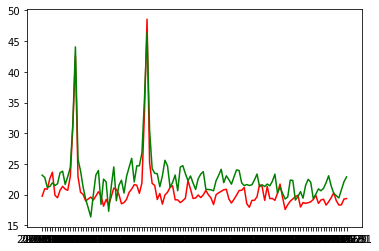

In [217]:
plt.plot(number2019,newdataT_2019['대구광역시', '수성구','간식'],'r',number2020,newdataT_2020['대구광역시', '수성구','간식'],'g')

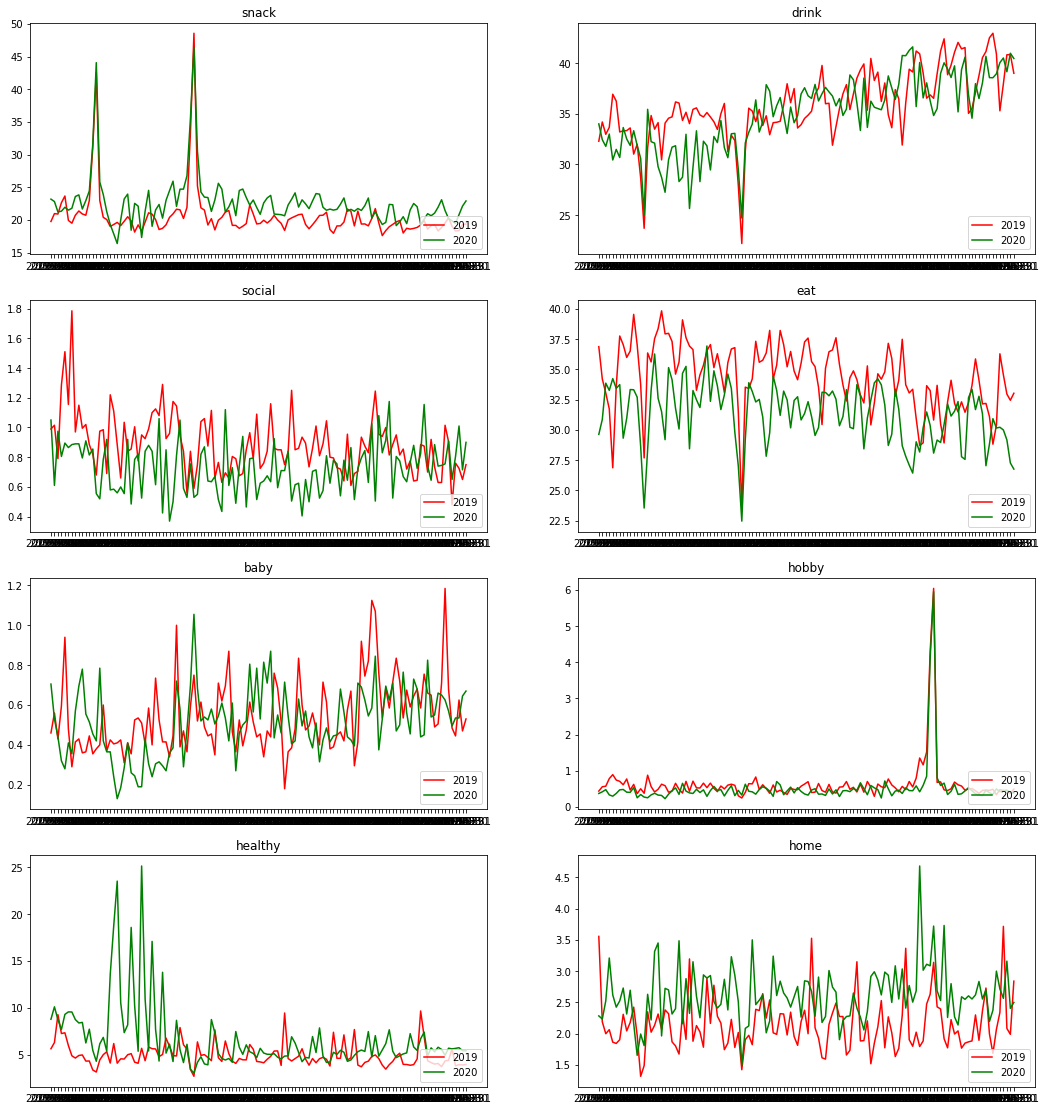

In [258]:
fig = plt.figure(figsize=(18,40))
plt.subplot(8,2,1)
plt.plot(number2019,daegu_s_snack2019,'r',label="2019")
plt.plot(number2020,daegu_s_snack2020,'g',label="2020")
plt.title("snack")
plt.legend(loc= "lower right")

plt.subplot(8,2,2)
plt.plot(number2019,daegu_s_drink2019,'r',label="2019")
plt.plot(number2020,daegu_s_drink2020,'g',label="2020")
plt.title("drink")
plt.legend(loc= "lower right")

plt.subplot(8,2,3)
plt.plot(number2019,daegu_s_social2019,'r',label="2019")
plt.plot(number2020,daegu_s_social2020,'g',label="2020")
plt.title("social")
plt.legend(loc= "lower right")

plt.subplot(8,2,4)
plt.plot(number2019,daegu_s_eat2019,'r',label="2019")
plt.plot(number2020,daegu_s_eat2020,'g',label="2020")
plt.title("eat")
plt.legend(loc= "lower right")

plt.subplot(8,2,5)
plt.plot(number2019,daegu_s_baby2019,'r',label="2019")
plt.plot(number2020,daegu_s_baby2020,'g',label="2020")
plt.title("baby")
plt.legend(loc= "lower right")

plt.subplot(8,2,6)
plt.plot(number2019,daegu_s_hobby2019,'r',label="2019")
plt.plot(number2020,daegu_s_hobby2020,'g',label="2020")
plt.title("hobby")
plt.legend(loc= "lower right")

plt.subplot(8,2,7)
plt.plot(number2019,daegu_s_healthy2019,'r',label="2019")
plt.plot(number2020,daegu_s_healthy2020,'g',label="2020")
plt.title("healthy")
plt.legend(loc= "lower right")

plt.subplot(8,2,8)
plt.plot(number2019,daegu_s_home2019,'r',label="2019")
plt.plot(number2020,daegu_s_home2020,'g',label="2020")
plt.title("home")
plt.legend(loc= "lower right")

plt.show()

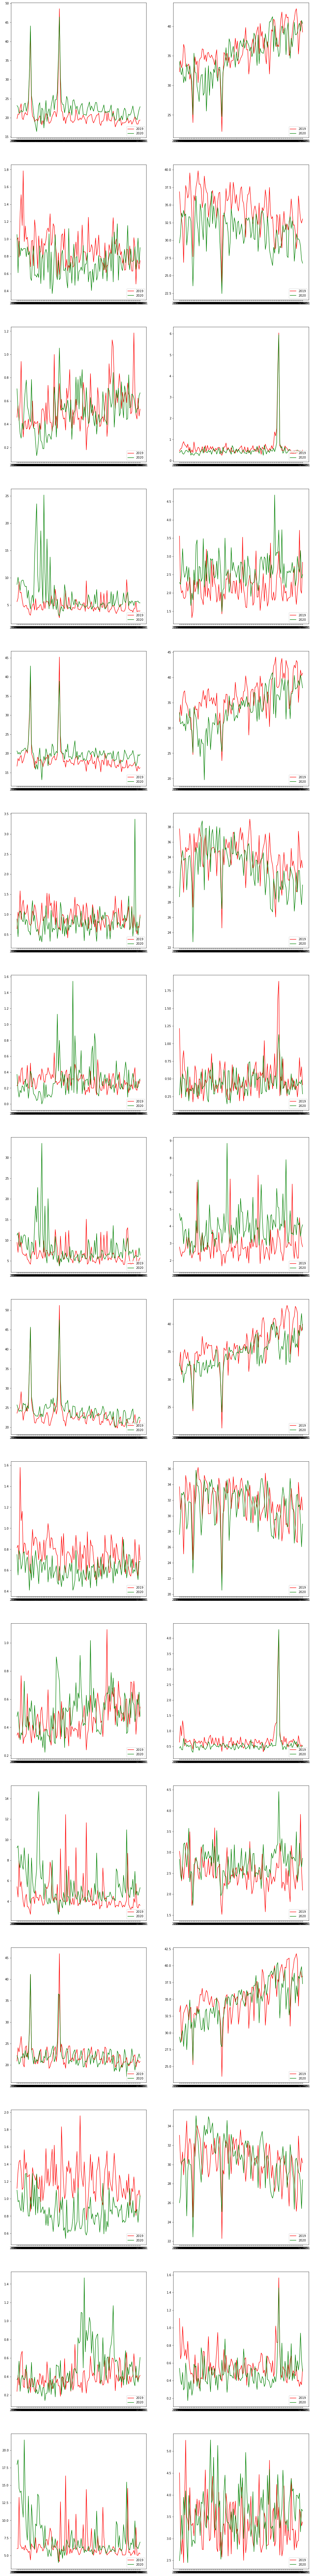

In [257]:
fig = plt.figure(figsize=(18,320))
for i in range(0,32):
    plt.subplot(32,2,i+1)
    plt.plot(number2019,newdataT_2019[newdataT_2019.columns[i]],'r',label="2019")
    plt.plot(number2020,newdataT_2020[newdataT_2020.columns[i]],'g',label="2020")
    plt.legend(loc= "lower right")